In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats
import math

In [3]:
initial = pd.read_csv('C:/users/rusty/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [5]:
ps = initial[['Date', 'Morph', 'Post patch?', 'Post patch pipette R', 'PCR cycles', 'SM_QC_PF', 'Bad dates']]
ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps['Morph'] = ps['Morph'].astype('category')
#ps['Bad dates'] = ps['Bad dates'].astype('category')
#ps['PCR cycles'] = ps['PCR cycles'].astype('category')
ps['Post patch?'] = ps['Post patch?'].astype('category')
ps['SM_QC_PF'] = ps['SM_QC_PF'].astype('category')
ps['Bad dates'] = ps['Bad dates'].astype('category')
ps = ps[ps['PCR cycles'] == 21]
ps = ps[ps['Bad dates'] != 'x']
ps = ps[ps['SM_QC_PF'] != 'cnt']
ps = ps[(ps['Morph'] == 'y') | (ps['Morph'] == 'n') | (ps['Morph'] == 'q')]
ps.dropna(subset=['Morph', 'Post patch?'], inplace=True)
ps

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Date,Morph,Post patch?,Post patch pipette R,PCR cycles,SM_QC_PF,Bad dates
4968,2017-04-19,n,Outside-Out,NaN,21.0,fail,NaN
4969,2017-04-19,y,Outside-Out,NaN,21.0,pass,NaN
4970,2017-04-19,n,No-Seal,NaN,21.0,fail,NaN
4971,2017-04-19,y,Nucleated,NaN,21.0,pass,NaN
4972,2017-04-19,y,Outside-Out,NaN,21.0,pass,NaN
4973,2017-04-19,y,Nucleated,NaN,21.0,pass,NaN
4974,2017-04-19,n,No-Seal,NaN,21.0,pass,NaN
4975,2017-04-19,q,Nucleated,NaN,21.0,pass,NaN
4978,2017-04-19,n,No-Seal,NaN,21.0,fail,NaN
4979,2017-04-19,n,No-Seal,NaN,21.0,pass,NaN


In [6]:
ps = ps.drop('Bad dates', 1)
ps = ps.drop('SM_QC_PF', 1)
ps.head()

,Date,Morph,Post patch?,Post patch pipette R,PCR cycles
4968,2017-04-19,n,Outside-Out,NaN,21.0
4969,2017-04-19,y,Outside-Out,NaN,21.0
4970,2017-04-19,n,No-Seal,NaN,21.0
4971,2017-04-19,y,Nucleated,NaN,21.0
4972,2017-04-19,y,Outside-Out,NaN,21.0


In [88]:
#ps['Post patch?'].value_counts()

In [7]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

In [8]:
nuc = nucleated(ps)
nuc["post patch class"] = "a.Nucleated"
part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "b.Partial nucleated"
out_out = outside_out(ps)
out_out["post patch class"] = "c.Outside out"
noSeal = no_seal(ps)
noSeal["post patch class"] = "d.No seal"
entirecell = entire_cell(ps)
entirecell['post patch class'] = "e.Entire cell"

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [9]:
frames = [nuc, part_nuc, out_out, noSeal, entirecell]
ps = pd.concat(frames)
ps.head()

,Date,Morph,Post patch?,Post patch pipette R,PCR cycles,post patch class
4971,2017-04-19,y,Nucleated,NaN,21.0,a.Nucleated
4973,2017-04-19,y,Nucleated,NaN,21.0,a.Nucleated
4975,2017-04-19,q,Nucleated,NaN,21.0,a.Nucleated
5022,2017-04-21,n,Nucleated,NaN,21.0,a.Nucleated
5026,2017-04-21,n,Nucleated,NaN,21.0,a.Nucleated


In [10]:
ps = ps.drop('Post patch?', 1)
ps = ps.drop('Post patch pipette R', 1)
ps = ps.drop('Date', 1)
ps.head()

,Morph,PCR cycles,post patch class
4971,y,21.0,a.Nucleated
4973,y,21.0,a.Nucleated
4975,q,21.0,a.Nucleated
5022,n,21.0,a.Nucleated
5026,n,21.0,a.Nucleated


In [16]:
y = ps[ps['Morph'] == 'y']
y["morpho_call"] = "y"
n = ps[ps['Morph'] == 'n']
n['morpho_call'] = 'n'
q = ps[ps['Morph'] == 'q']
q['morpho_call'] = 'q'
frames = [y, n, q]
morphpp = pd.concat(frames)
#morphpp = morphpp.drop('Date', 1)
morphpp = morphpp.groupby(['morpho_call', 'post patch class']).count()
morphpp = morphpp.reset_index()
morphpp = morphpp.pivot_table(index = ['post patch class'], columns = 'morpho_call', 
                              values = ['Morph'], aggfunc = 'sum', fill_value=0)
morphpp
#ps['Morph'].value_counts()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

Morph          
morpho_call             n    q    y
post patch class                   
a.Nucleated           302  193  252
b.Partial nucleated   137   35   39
c.Outside out          50   11   31
d.No seal             486   26   46
e.Entire cell          12    3    0

In [17]:
morph_pcts = morphpp.div(morphpp.sum(1), axis = 0)*100
morph_pcts

Morph                      
morpho_call                  n          q          y
post patch class                                    
a.Nucleated          40.428380  25.836680  33.734940
b.Partial nucleated  64.928910  16.587678  18.483412
c.Outside out        54.347826  11.956522  33.695652
d.No seal            87.096774   4.659498   8.243728
e.Entire cell        80.000000  20.000000   0.000000

In [18]:
#nucs = list(morph_pcts['Morph', 'Nucleated'])
#part_nucs = list(morph_pcts['Morph', 'Partial nucleated'])
#out_outs = list(morph_pcts['Morph', 'Outside out'])
#no_seal = list(morph_pcts['Morph', 'No seal'])
#entire = list(morph_pcts['Morph', 'Entire cell'])
y = list(morph_pcts['Morph', 'y'])
q = list(morph_pcts['Morph', 'q'])
n = list(morph_pcts['Morph', 'n'])
y

[33.734939759036145,
 18.48341232227488,
 33.695652173913047,
 8.2437275985663092,
 0.0]

In [19]:
totals = list(morphpp.sum(1))
totals

[747, 211, 92, 558, 15]

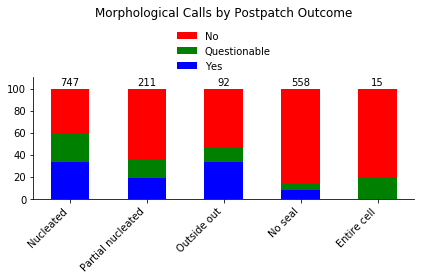

In [20]:
index = np.arange(len(totals))
barWidth = 0.5
fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(0,110)
post_patch = ['Nucleated', 'Partial nucleated', 'Outside out', 'No seal', 'Entire cell']
plt.xticks(index, post_patch, rotation = 45, size = 10, ha = 'right')
axes = plt.gca()
axes.set_ylim([0,160])
plt.yticks([0,20,40,60,80,100])

yes = plt.bar(index, y, color = 'blue', width = barWidth)
quest = plt.bar(index, q, color = 'green', bottom = y, width = barWidth)
no = plt.bar(index, n, color = 'red', bottom = [i+j for i,j in zip(y, q)], width = barWidth)
for bar, total in zip(no, totals):
    ax.text(bar.get_x()+bar.get_width()/2, 101, total, ha = 'center', va = 'bottom', fontsize=10)
leg = plt.legend((no,quest,yes), ('No', 'Questionable', 'Yes'), loc = 'upper center', frameon=False)
plt.title('Morphological Calls by Postpatch Outcome')
plt.tight_layout()
plt.show()
fig.savefig('morpho_calls_by_postpatch_outcome', dpi=300)

In [69]:
#yes = y.groupby(['morpho_call', 'post patch class']).count()
#yes = yes.reset_index()
#yes = yes.pivot_table(values = 'Morph', index = 'morpho_call', columns = 'post patch class', aggfunc = 'sum')
#yes